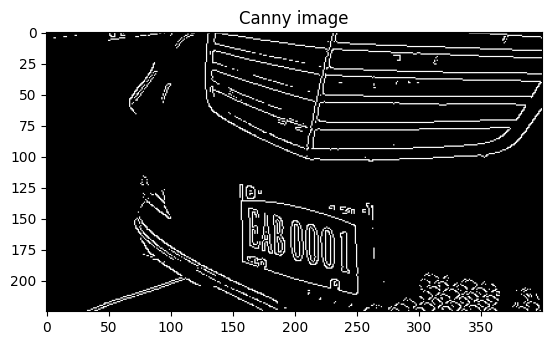

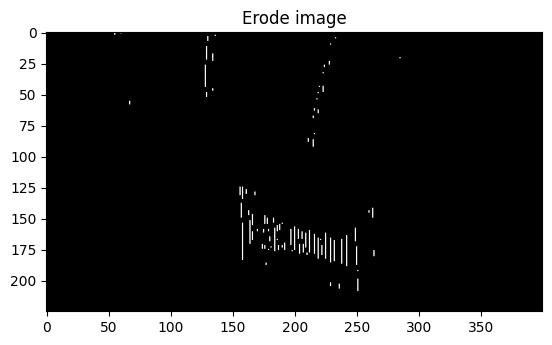

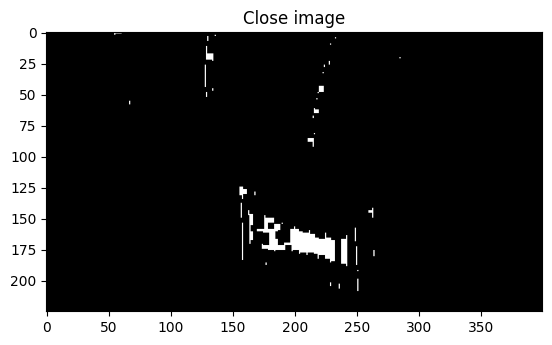

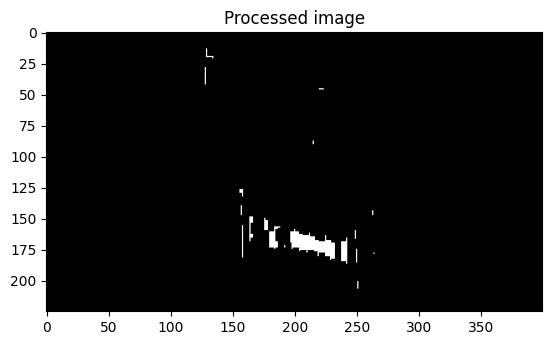

Selected rows: [157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
Selected columns: [158, 242]
Min row: 144. Max row: 196
Min column: 155. Max column: 245


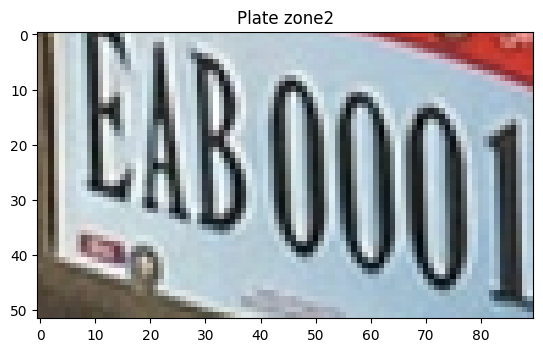

In [1]:
import numpy as np
import cv2 #This is openCV
import matplotlib.pyplot as plt 

#Upload images and save it in gray scale
img_original = cv2.imread('Fig/Placa9.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)

bilateral_blur = cv2.bilateralFilter(img_gray,11,17,17)
edged = cv2.Canny(bilateral_blur, 240, 250)

kernel_v_line = np.ones((5, 1), np.uint8)
  
erode_v = cv2.erode(edged, kernel_v_line) 

plt.title("Canny image")
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Erode image")
plt.imshow(cv2.cvtColor(erode_v, cv2.COLOR_BGR2RGB))
plt.show()


kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(erode_v, cv2.MORPH_CLOSE, kernel)
plt.title("Close image")
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
plt.show()

processed_image = cv2.erode(closing, kernel_v_line) 
plt.title("Processed image")
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.show()

white_in_rows = np.zeros(processed_image.shape[0])
for i, row in enumerate(processed_image):
    for value in row:
        if value == 255: white_in_rows[i]+=1
        
white_in_columns = np.zeros(processed_image.shape[1])
for i in range(processed_image.shape[1]):
    for value in processed_image[:, i]:
        if value == 255: white_in_columns[i]+=1

min_white_pixels_columns = 20
min_white_pixels_rows = 6
selected_rows = [i for i, row in enumerate(white_in_rows) if row > min_white_pixels_rows]
selected_columns = [i for i, column in enumerate(white_in_columns) if column > min_white_pixels_columns]

print(f"Selected rows: {selected_rows}")
print(f"Selected columns: {selected_columns}")

if selected_rows and selected_columns:

    row_security_factor = 13
    column_security_factor = 3

    x1 = min(selected_rows)
    x2 = max(selected_rows)
    y1 = min(selected_columns)
    y2 = max(selected_columns)

    if x1 - row_security_factor > 0: x1 -= row_security_factor
    if y1 - column_security_factor > 0: y1 -= column_security_factor
    if x2 + row_security_factor > 0: x2 += row_security_factor
    if y2 + column_security_factor > 0: y2 += column_security_factor

    print(f"Min row: {x1}. Max row: {x2}")
    print(f"Min column: {y1}. Max column: {y2}")
    plate_zone2 = img_original[x1:x2, y1:y2]

    plt.imshow(cv2.cvtColor(plate_zone2, cv2.COLOR_BGR2RGB))
    plt.title("Plate zone2")
    plt.show()
else: print("Plate not found")